In [1]:
import tensorflow as tf
from tensorflow import keras

#### Preparing the Dataset

Note:

For a feature scaler like StandardScaler, fit computes the mean and std(standard deviation) to be used for later scaling (just a computation) based on the given data, nothing is given to you. transform uses a previously computed mean and std to autoscale the data (subtract mean from all values and then divide it by std). fit_transform does both at the same time.

So, we would be applying the scaler.fit_transform on the train data, and just apply scaler.transform on the validation and test data.

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data,
         housing.target.reshape(-1, 1), random_state=42)

X_train, X_valid, y_train, y_valid =  train_test_split( X_train_full, 
        y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

#### Defining a Custom Loss Function - Huber Loss

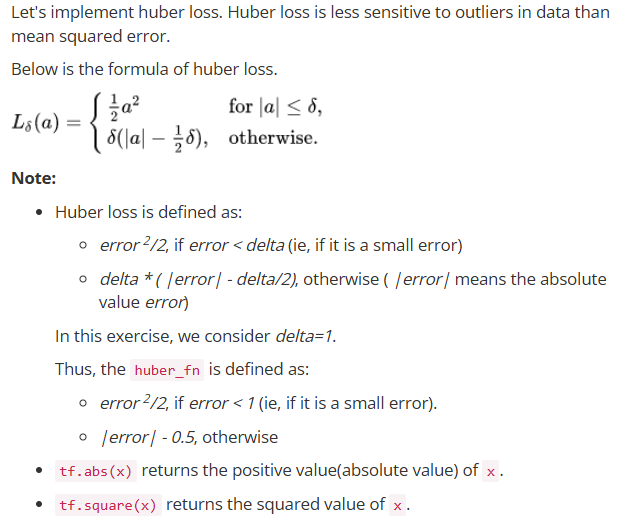

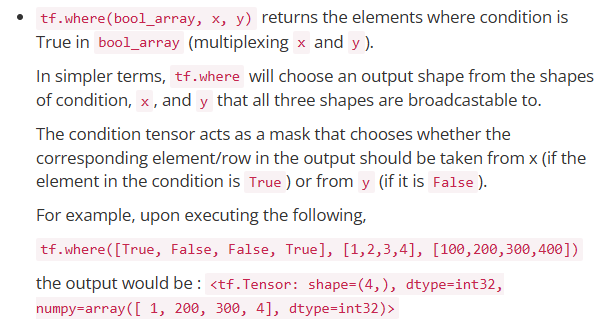

In [21]:
def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < 1
        squared_loss = tf.square(error) / 2
        linear_loss  = tf.abs(error) - 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)

#### Building the Network

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation= "selu", 
       kernel_initializer= "lecun_normal", 
       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [25]:
model.compile(loss="huber_fn", optimizer="nadam", metrics=["mae"])

#### Training the Model

In [28]:
model.fit(X_train_scaled, y_train, epochs=15,
  validation_data=(X_valid_scaled, y_valid))

Epoch 1/15


ValueError: in user code:

    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/compile_utils.py:184 __call__
        self.build(y_pred)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/compile_utils.py:133 build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/python/util/nest.py:869 map_structure
        structure[0], [func(*x) for x in entries],
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow/python/util/nest.py:869 <listcomp>
        structure[0], [func(*x) for x in entries],
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/engine/compile_utils.py:273 _get_loss_object
        loss = losses_mod.get(loss)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/losses.py:2136 get
        return deserialize(identifier)
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/losses.py:2095 deserialize
        printable_module_name='loss function')
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/utils/generic_utils.py:709 deserialize_keras_object
        .format(printable_module_name, object_name))

    ValueError: Unknown loss function: huber_fn. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
